In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import mlflow

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
12454,0.09,0.97,7,254,4,1,1,0,RandD,medium
315,0.73,0.86,4,245,6,0,1,0,sales,low
1630,0.10,0.86,6,288,4,0,1,0,sales,medium
3132,0.50,0.73,3,148,3,0,0,0,accounting,low
7856,0.80,0.78,5,266,3,0,0,0,RandD,low
8419,0.55,0.97,5,125,4,0,0,0,sales,medium
12469,0.41,0.52,2,159,3,0,1,0,sales,low
8476,0.90,0.50,4,139,2,0,0,0,accounting,low
9376,0.60,0.91,4,185,3,1,0,0,product_mng,low
10414,0.57,0.94,3,230,2,0,0,0,hr,low


Variables transformations
To plot some statistical graphics and for better understanding, we make some transformations in the variables:

sales: Rename to department
salary: Convert the type of the variable from categorical to numerical.

In [6]:

# RENAME column sale to department
df.rename(columns={'sales': 'department'}, inplace = True)

# Convert salary variable type to numeric
df['salary'] = df['salary'].map({'low':1, 'medium':2, 'high':3})



4. Descripitve Analysis
The descripitve Analysis is used to simplify and summarize the mainly characteristics of the dataset. In other words, show what kind of information the dataset has. The Pandas method describe generates a descriptive statistics that summarize the central tendency, dispersion and shape of the dataset. By using this method in Human Resource dataset important insights is possible to see:

That approximately 24% os the employees left the company.
The satisfaction level is around 62% and performance is around 72%.
Employees work in average on 4 projects with 200 hours worked per month.

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


### 4.1 How many employees works in each department?
Depending on how many employees work in each department, you can learn more about the type of company segment.

In [8]:
print(df['department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


### 4.2 How many employees per salary range?
The employees salary is divided in Low (1), Medium (2) and High (3), distributed as follows:

In [9]:
print(df['salary'].value_counts())

1    7316
2    6446
3    1237
Name: salary, dtype: int64


### how many employees per salary range and department?

In [10]:
table = df.pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table

salary,1,2,3
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns 
sns.set()

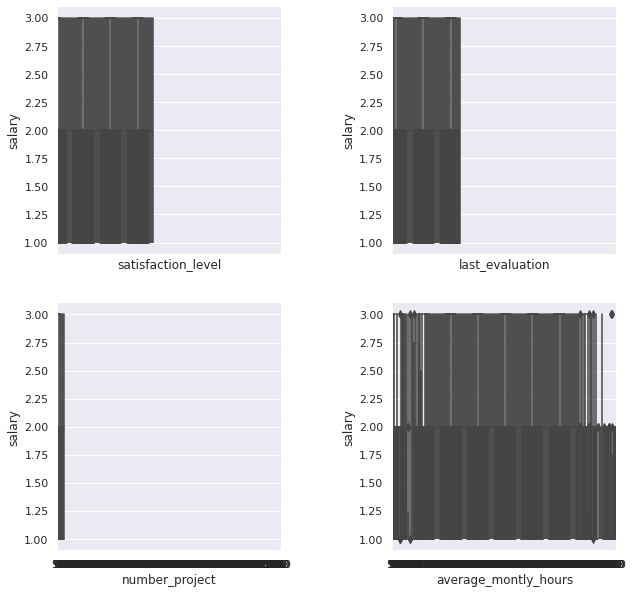

In [13]:
f, axes = plt.subplots(2,2, figsize=(10,10), sharex=True)

plt.subplots_adjust(wspace=0.5)# adjust the space between the plots

sns.despine(left=True)

# plot a boxplot of satisfaction_level to see if there is outliers
sns.boxplot(x='satisfaction_level', y='salary' ,data=df ,orient='v',ax=axes[0,0])

# plot a boxplot of last_evaluation to see if there is outliers
sns.boxplot( x= 'last_evaluation', y='salary' , data=df ,orient='v',ax=axes[0,1])

# plot a boxplot of number_project to see if there is outliers
sns.boxplot( x= 'number_project', y='salary', data=df,orient='v', ax=axes[1,0])

# plot a boxplot of average_montly_hours to see if there is outliers
sns.boxplot( x= 'average_montly_hours',y='salary'  ,data=df, ax=axes[1,1]);

#Put a ; at the end of the last line to suppress the printing of output 

/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='time_spend_company'>

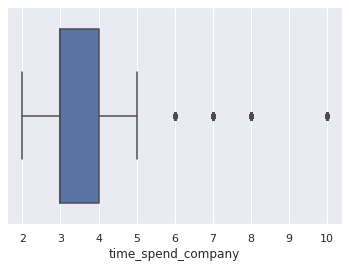

In [14]:
sns.boxplot('time_spend_company',  data=df, orient='v')

<AxesSubplot:ylabel='satisfaction_level'>

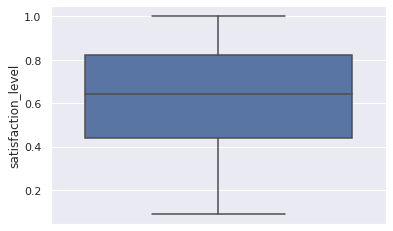

In [15]:
sns.boxplot(y='satisfaction_level',  data=df, orient='v')

### 4.5 Correlation Analysis
The correlation is a very useful statitiscal analysis that describes the degree of relationship between two variables. Let´s see the table below and the heat map to see what relationship are in the data.

In the heat map is possible to see:

Negative correlation of (-0.39) between satisfaction_level and the employees that left the company.
The highest positive correlation is between number of projects and average monthly hours (0.42).
Last_evaluation is high correlated to number_project(0.35)and average_monthly_hours(0.34).
Work_accident have a low negative correlation(-0.15)and salary (-0.16) with employees that left.

In [16]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


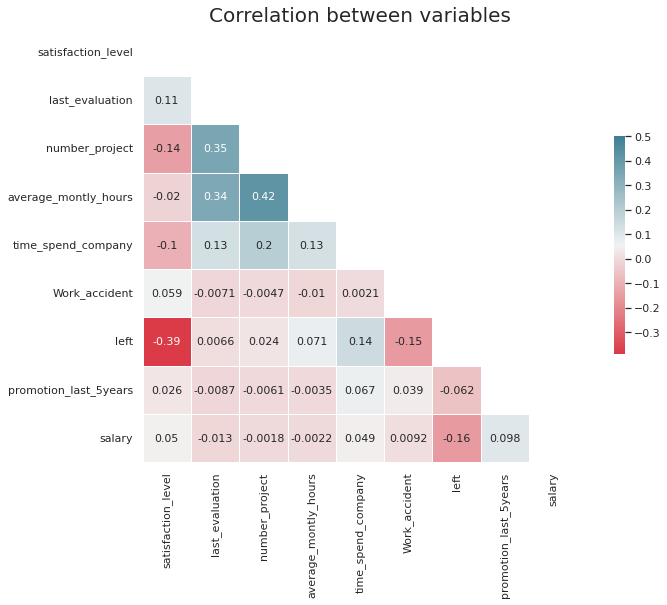

In [17]:
sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Inserir a figura
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Desenhar o heatmap com a máscara
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);

### 5. Hypothesis
Now let's extract some more informations and testing some hypothesis

### 5.1 How many employees left the company?

In [18]:
print(df['left'].value_counts()[1],"employees left the company")

3571 employees left the company


/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


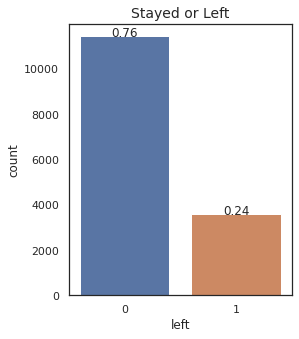

In [19]:
# The plot show the amount o employees that stayed and left the company.
plt.figure(figsize=(4,5))
ax = sns.countplot(df.left)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Stayed or Left', fontsize=14);

### First Hypothesis
The first hypothesis is that salary is the reason why the employees left the company. Let's see if is this correct.

/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


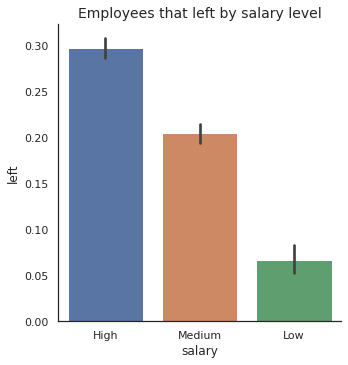

In [20]:
j = sns.factorplot(x='salary', y='left', kind='bar', data=df)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['High', 'Medium', 'Low']);


In the graphic Salaries by department is possible to see the distribuition of the salaries by department.

Most of the employees of the sales department have low or medium salaries, this may be due that in some companies the sales commission is paid separately.
Technical department is in the second place where most of the employees receives low and medium salaries.

/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


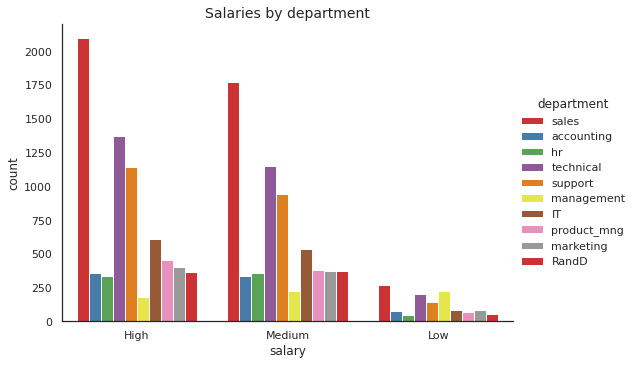

In [21]:
h = sns.factorplot(x = 'salary', hue='department', kind ='count', size = 5,aspect=1.5, data=df, palette='Set1' )
plt.title("Salaries by department", fontsize=14)
h.set_xticklabels(['High', 'Medium', 'Low']);


In the graphic(Salary Comparison):

The manangement department has the biggest difference between the salary of the employees who stayed and those that left.
It's not possible to see a huge difference in other departments.
The first hypothesis looks very weak to be the main reason why the employees left the company.

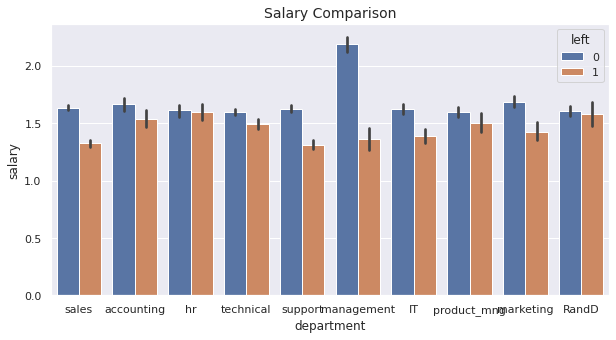

In [22]:
sns.set()
plt.figure(figsize=(10,5))
sns.barplot(x='department', y='salary', hue='left', data=df)
plt.title('Salary Comparison', fontsize=14);

### Second Hypothesis
It is a dangerous job?

The second hypothesis is: employees leave the company because work is not safe.

/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


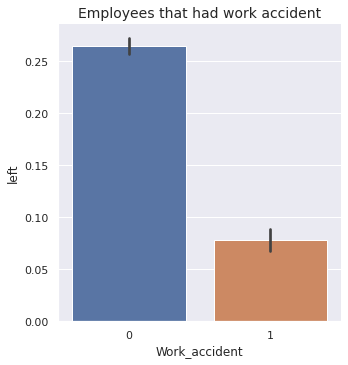

In [23]:
sns.factorplot(x='Work_accident', y='left', kind='bar', data=df)
plt.title('Employees that had work accident', fontsize=14);


About 14% of the employees had a work accident, although of the high number only of accidents only 169 employees data left the company had work a accident. Then this hypothesis is discarded.

In [24]:

print(df.Work_accident.sum())
print(df.Work_accident.mean())
print((df[df['left']==1]['Work_accident']).sum())

2169
0.1446096406427095
169


### Third Hypothesis
Is this company a good place to grow professionally?

/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


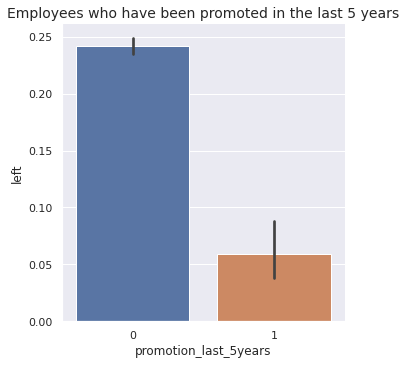

In [25]:
sns.factorplot(x='promotion_last_5years', y='left', kind='bar', data=df)
plt.title('Employees who have been promoted in the last 5 years', fontsize=14);


In the last five years only 319 employees had promotion, this is equivalent to 2% of all employees. This may be a problem because if it is difficult to get promoted many employees become unmotivated and start looking for a new job.

In [26]:
print(df.promotion_last_5years.sum())
print(df.promotion_last_5years.mean())

319
0.021268084538969265



Years in the company

In the graphic 'Years in the company' we can identify an important characteristic.

Employees with 7 or more years didn't left, maybe because with the passing of the years they are more confortable and not so interested in look for a new challenge in other company.
The problem starts when the employees have more than 3 years and get worst when they achieve 5 years.
It is too early to say that the difficult to get promoted is the main reason for the leaving of the employees, but more research is needed.

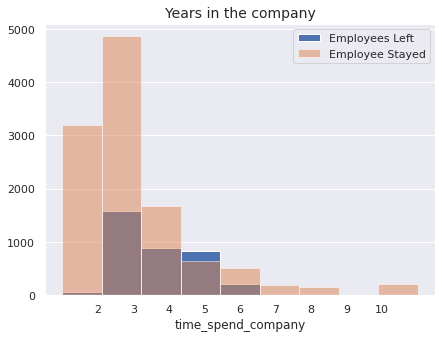

In [27]:

plt.figure(figsize =(7,5))
bins = np.linspace(1.0, 11,10)
plt.hist(df[df['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['time_spend_company'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_company')
plt.title('Years in the company', fontsize=14)
plt.legend(loc='best');

Performance Analysis
There are 2 distincts groups of employees. A group with poor performance and other with high performance employees. It's natural that employees that don't work well leave the company, but the main problem is that the high performance employees is leaving too and it's necessary to understand why.

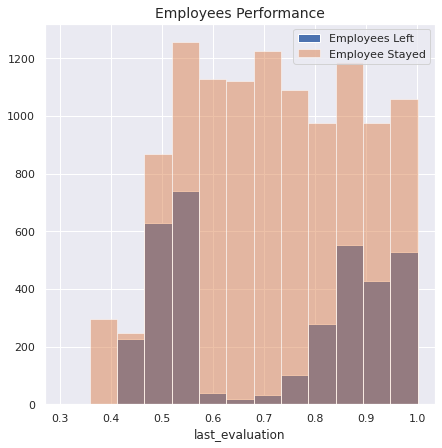

In [28]:
plt.figure(figsize =(7,7))
bins = np.linspace(0.305, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Performance', fontsize=14)
plt.xlabel('last_evaluation')
plt.legend(loc='best');

It is possible to see that 98% of employees with few projects that left also have poor performance.

And 95% of the employees with 5 or more projects that left the company had the highest performance.

3 or 4 are the best number of projects.

poor_performance_left: 1531
poor_performance_stayed: 36


high_performance_left: 47
high_performance_stayed 889


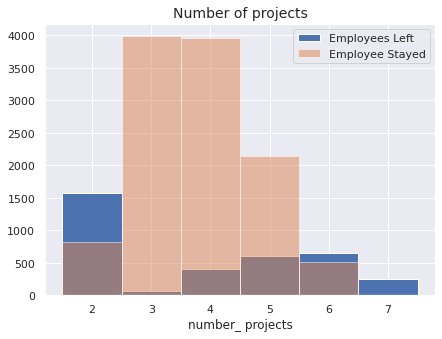

In [29]:
poor_performance_left = df[(df.last_evaluation <= 0.62) & (df.number_project == 2) & (df.left == 1)]
print('poor_performance_left:',len(poor_performance_left))

poor_performance_stayed = df[(df.last_evaluation > 0.62) & (df.number_project == 2) & (df.left == 1)]
print('poor_performance_stayed:',len(poor_performance_stayed))

print('\n')

high_performance_left= df[(df.last_evaluation <= 0.62) & (df.number_project >=5) & (df.left == 1)]
high_performance_stayed= df[(df.last_evaluation > 0.8) & (df.number_project >=5) & (df.left == 0)]
print('high_performance_left:',len(high_performance_left))
print('high_performance_stayed', len(high_performance_stayed))

plt.figure(figsize =(7,5))
bins = np.linspace(1.5,7.5, 7)
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Number of projects', fontsize=14)
plt.xlabel('number_ projects')
plt.legend(loc='best');

Working hours
Again, there are 2 groups of employees. A group that works fewer hours and another that works more hours compared to the average hours worked.

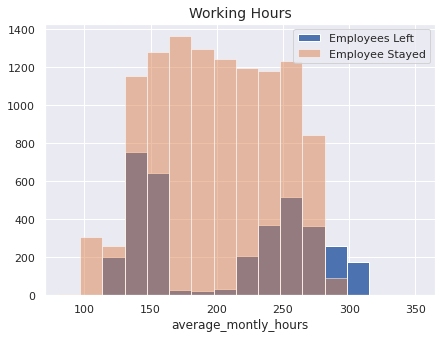

In [30]:
plt.figure(figsize =(7,5))
bins = np.linspace(80,315, 15)
plt.hist(df[df['left']==1]['average_montly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['average_montly_hours'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Working Hours', fontsize=14)
plt.xlabel('average_montly_hours')
plt.xlim((70,365))
plt.legend(loc='best');

Clearly is possible to see that the employees with 6 projects or more, work on average 20% more hours.

number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64


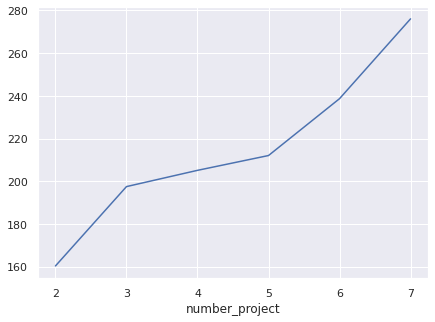

In [31]:
groupby_number_projects = df.groupby('number_project').mean()
groupby_number_projects = groupby_number_projects['average_montly_hours']
print(groupby_number_projects)
plt.figure(figsize=(7,5))
groupby_number_projects.plot();

With the information above the employees that left the company are grouped as:

Employees with 2 projects and worked less than the average of the company.
Employees with 5 or more projects that worked at least 20% more than the average.

In [32]:
work_less_hours_left = df[(df.average_montly_hours < 200) & (df.number_project == 2) & (df.left == 1)]
print('work_less_hours_left:',len(work_less_hours_left))

work_more_hours_left = df[(df.average_montly_hours > 240) & (df.number_project >=5 ) & (df.left == 1)]
print('work_more_hours_left:',len(work_more_hours_left))

#<p><font color="red">Aqui você fala sobre a relação entre horas de trabalho e quantidade de projetos, mas isso não é exibido no gráfico</font></p>

work_less_hours_left: 1535
work_more_hours_left: 1225



Satisfaction Level
It is possible to see 3 interesting peaks in the satisfaction levels of the employees that left the company.

We have a peak of employees who are totally disappointed.
Another peak at 0.4, representing another group with the satisfaction level below the average.
And another amount in the range 0.7 and 0.9, with employees that left, although the high satisfaction.

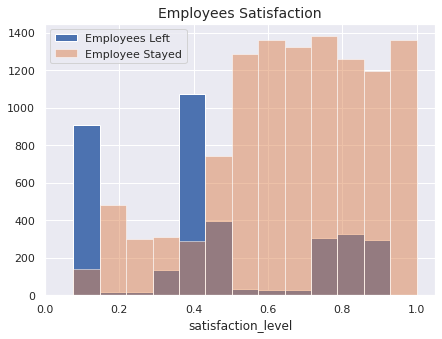

In [33]:
plt.figure(figsize =(7,5))
bins = np.linspace(0.006,1.000, 15)
plt.hist(df[df['left']==1]['satisfaction_level'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['satisfaction_level'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Satisfaction', fontsize=14)
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

### Average satisfaction for years in the company

In [34]:
groupby_time_spend = df.groupby('time_spend_company').mean()
groupby_time_spend['satisfaction_level']

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64


When the employees becames unsatisfied
In next results it is clear the drop in satisfaction when employees are working on 6 or more projects.

/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


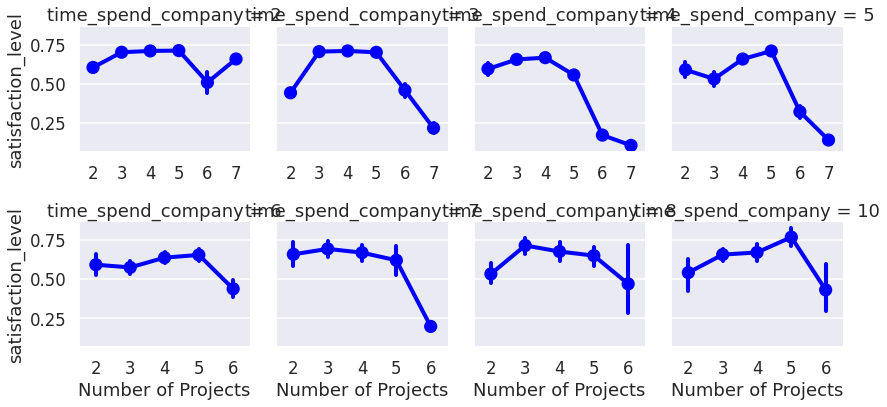

In [35]:
sns.set()
sns.set_context("talk")
ax = sns.factorplot(x="number_project", y="satisfaction_level", col="time_spend_company",col_wrap=4, size=3, color='blue',sharex=False, data=df)
ax.set_xlabels('Number of Projects');


Let´s see why the most valuable employees tend to leave.

From the employees that left with high performance, 4 or more years in the company and working on 5 or more project had:

Low satisfaction level,
Worked more hours,
Haven´t been promoted in the last five years.

/home/vaibhavarora/projects/dsvenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


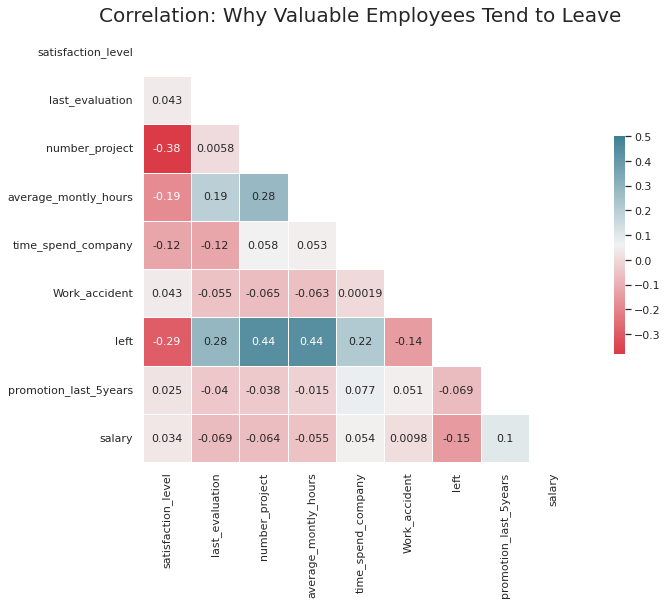

In [36]:
func_living = df[(df.last_evaluation >= 0.70) | (df.time_spend_company >=4) | (df.number_project >= 5)]

corr2 = func_living.corr()

sns.set(style='white')

mask = np.zeros_like(corr2, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Insert the graphic
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Draw heat map mask
ax = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation: Why Valuable Employees Tend to Leave', fontsize=20);

### Summary of the Exploratory Data Analysis
It is a relatively young company, on average, employees have 3 or 4 years in the company and the oldest employees are working 10 years.
The biggest difference in the salary from who stayed and those who left, was found in the managemnet department, in the others departments although the salaries of who stayed be higher in average, it is not a big difference.
The number of employees that had a work accident is about 14%, of which only 169 employees left the company, so don't seem to have a correlation with the employees leaving.
In five years only 2% of the employees were promoted. Is possible that many employees get unmotivated and start planning to leave.
Employees with 7 or longer in the company didn't left. Employees with 5 years have more chances to leaving.
There are 2 distincts groups of employees performance that left. A group with poor performance with 2 projects and others with high performance with 5 or more projects. It is not necessary retain all the employees, the focus is on keeping employees with high performance.
The employees with 4 years in the company have the lowest average satisfaction level of all the company with (0.47).
The satisfaction drops when the employees are working in 5 or more projects. A number of 3 or 4 projects seems to be ideal independent of the time spend in the company.
The employees with 5 or more projects that left also worked at least 20% more hours than the average of the company.
The satisfaction level of the employees that left is grouped in totally disappointed, below the average satisfaction and satisfied.

In [37]:
print(df['left'].value_counts())

0    11428
1     3571
Name: left, dtype: int64


In [38]:
import sklearn
from sklearn.metrics import roc_curve, auc, accuracy_score, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric
from mlflow import log_metric, log_param, log_artifact
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

In [39]:
experiment_name = 'human_resource_analytics'
artifact_repository = './mlflow-run'
# Initialize MLflow client
client = MlflowClient()

# If experiment doesn't exist then it will create new
# else it will take the experiment id and will use to to run the experiments
try:
    # Create experiment 
    experiment_id = client.create_experiment(experiment_name, artifact_location=artifact_repository)
except:
    # Get the experiment id if it already exists
    experiment_id = client.get_experiment_by_name(experiment_name).experiment_id
mlflow.set_experiment(experiment_name)
mlflow.end_run()
artifact_path = mlflow.get_artifact_uri()
uri = mlflow.tracking.get_tracking_uri()
print(artifact_path)
print(uri)

./mlflow-run/d36e996e9ad54e14a6b69eb2796ab33f/artifacts
file:///home/vaibhavarora/projects/human%20resource%20analytics/mlruns


In [40]:
exclude_feature = ['Work_accident' ,'promotion_last_5years', 'salary']
# Define Target columns
target = df['left'].map({"Notleft": 0 , "Left": 1})

# Define numeric and categorical features
numeric_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_features = [col for col in numeric_columns if col not in exclude_feature]
categorical_features = [col for col in categorical_columns if col not in exclude_feature]

# Define final feature list for training and validation
features = numeric_features + categorical_features
# Final df for training and validation
df= df[features]
df = df.fillna(0)

# Split df in train and vlaidation
X_train, X_valid, y_train, y_valid = train_test_split(df, target, test_size=0.15, random_state=10)

# Perform label encoding for categorical variable
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(X_train.loc[:, feature])
    X_train.loc[:, feature] = le.transform(X_train.loc[:, feature])
    X_valid.loc[:, feature] = le.transform(X_valid.loc[:, feature])


In [41]:
def model_experimentation(classifier, param, model_name, run_name):
    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Get run id 
        run_id = run.info.run_uuid
        
     

        # To enable autologging for scikit-learn estimators.
        # 1) Log estimator parameters
        # 2) Log common metrics for classifier
        # 3) Log model Artifacts
        mlflow.sklearn.autolog()

        # Define custom tag
        tags = {"Application": "Payment Monitoring Platform",
                "release.candidate": "PMP",
                "release.version": "2.2.0"}
        
        # Set Tag
        mlflow.set_tags(tags)
                # Provide brief notes about the run
        MlflowClient().set_tag(run_id,
                               "mlflow.note.content",
                               "This is experiment for exploring different machine learning models for Campus Recruitment Dataset")
                        
        # Log python environment details
        mlflow.log_artifact('requirements.txt')
        
        # Perform model training
        clf = classifier(**param)
        clf.fit(X_train, y_train)

        # Perform model evaluation 
        valid_prediction = clf.predict_proba(X_valid)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_valid, valid_prediction)
        roc_auc = auc(fpr, tpr) # compute area under the curve
        print("=====================================")
        print("Validation AUC:{}".format(roc_auc))
        print("=====================================")
        
        # log metrics
        mlflow.log_metrics({"Validation_AUC": roc_auc})

        # Plot and save metrics details    
        plot_confusion_matrix(clf, X_valid, y_valid, 
                              display_labels=['Placed', 'Not Placed'],
                              cmap='magma')
        plt.title('Confusion Matrix')
        filename = f'./images/{model_name}_validation_confusion_matrix.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename) 

        # Plot and save AUC details  
        plot_roc_curve(clf, X_valid, y_valid, name='Validation')
        plt.title('ROC AUC Curve')
        filename = f'./images/{model_name}_validation_roc_curve.png'
        plt.savefig(filename)
        # log model artifacts
        mlflow.log_artifact(filename)

In [42]:
mlflow.end_run()

In [43]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [44]:
df.fillna(999, inplace=True)

In [45]:

classifier = LogisticRegression
param = {"C":1, "random_state":20}
model_name = 'Lt'
run_name = 'LogisticRegression_model'
model_experimentation(classifier, param, model_name, run_name)

2021/10/22 06:37:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').